## import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

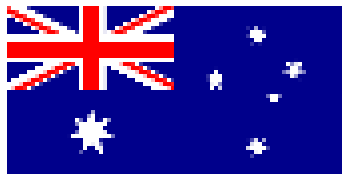

In [147]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
img = plt.imread("country-flags/png250px/au.png")
img = img[:,:,:3]
img.shape
a = ["in","ug","us","fj","lk"]
img = img[::3, ::3,:]
plt.imshow(img)
plt.axis("off")
color_table = img.reshape(-1,3)
# color_table
pd.DataFrame(color_table, columns = ["Red","Green","Blue"])
plt.savefig("au_pixel.svg")

In [69]:
km = KMeans(n_clusters=4)
km.fit(color_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

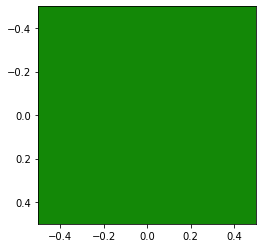

In [70]:
plt.imshow(km.cluster_centers_[1].reshape(1,1,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


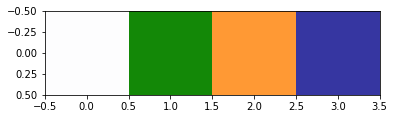

In [71]:
plt.imshow(km.cluster_centers_.reshape(1,4,3))
# plt.savefig("color_extract.svg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


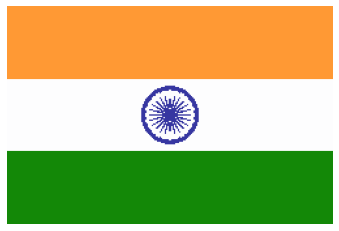

In [72]:
img2 = km.cluster_centers_[km.labels_].reshape(img.shape)
plt.imshow(img2)
plt.axis('off')
plt.savefig("in_pixel.svg")

In [12]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [13]:
(km.labels_ == 1).astype(int).mean()

0.17777777777777778

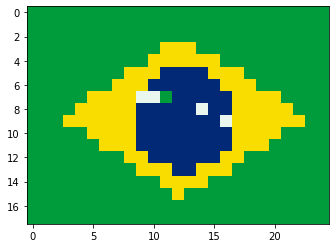

In [9]:
img = plt.imread("country-flags/png250px/ae.png")
img = img[:,:,:3]
img = img[::10, ::10,:]
color_table2 = img.reshape(-1,3)


In [10]:
img = plt.imread("country-flags/png250px/us.png")
img = img[:,:,:3]
img = img[::10, ::10,:]
color_table3 = img.reshape(-1,3)


In [12]:
#test = np.concatenate([color_table1,color_table2,color_table3])
#test.shape

In [13]:
color_table1.shape

NameError: name 'color_table1' is not defined

In [ ]:
color_table2.shape

In [ ]:
plt.imshow(img)

In [67]:
a = np.array([1, 2, 3])
b = np.array([5, 6])
np.concatenate([a, b])


NameError: name 'np' is not defined

In [ ]:
np.concatenate(tt).shape

In [73]:
import json 
f = open('country-flags/countries.json',) 
data = json.load(f) 
color_tables = []
for country in data: 
    img = plt.imread("country-flags/png250px/"+country.lower()+".png")
    img = img[:,:,:3]
    img = img[::10, ::10,:]
    color_tables.append(img.reshape(-1,3))
    
f.close() 

In [74]:
color_table = np.concatenate(color_tables)
color_table.shape

(100525, 3)

Text(0, 0.5, 'avg squared dist to centroid')

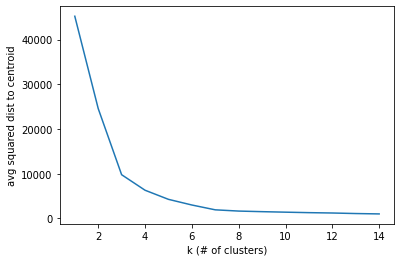

In [75]:
scores = pd.Series(dtype = float)

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(color_table)
    scores.loc[k] = km.inertia_
    
ax = scores.plot.line()
ax.set_xlabel("k (# of clusters)")
ax.set_ylabel("avg squared dist to centroid")

In [76]:
ax.get_figure().savefig("fig5.svg", bbox_inches="tight")

In [77]:
km = KMeans()
km.fit(color_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

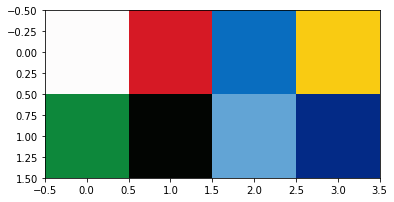

In [106]:
plt.imshow(km.cluster_centers_.reshape(2,4,3))
plt.savefig("eight_colors.svg")

In [79]:
# 0 = white, 1 = red, 2 = green, 3 = cerulean, 4 = yellow, 5 = navy, 6 = sapphire, 7 = black
km.labels_

array([7, 7, 7, ..., 4, 4, 4], dtype=int32)

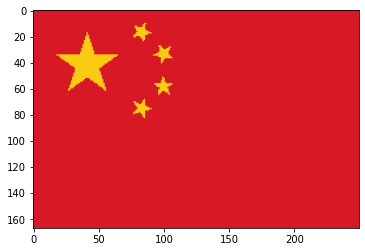

In [80]:
imgp = plt.imread("country-flags/png250px/cn.png")
imgp = imgp[:,:,:3]
pp = imgp.reshape(-1,3)
predict = km.predict(pp)
#predict
plt.imshow(km.cluster_centers_[predict].reshape(imgp.shape))
#img2 = km.cluster_centers_[km.labels_].reshape(imgp.shape)
#plt.imshow(img2)


In [83]:
(predict == 1).astype(int).mean()

0.9747544910179641

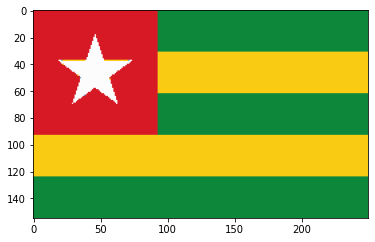

In [91]:
imgp = plt.imread("country-flags/png250px/tg.png")
imgp = imgp[:,:,:3]
pp = imgp.reshape(-1,3)
predict = km.predict(pp)
plt.imshow(km.cluster_centers_[predict].reshape(imgp.shape))
#plt.imshow(km.predict(imgp).reshape(imgp.shape))
plt.savefig("in_pixel.svg")

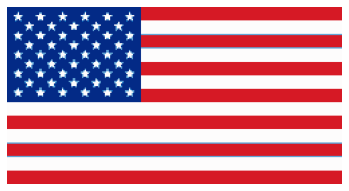

In [140]:
imgp = plt.imread("country-flags/png250px/us.png")
imgp = imgp[:,:,:3]
pp = imgp.reshape(-1,3)
predict = km.predict(pp)
plt.imshow(km.cluster_centers_[predict].reshape(imgp.shape))
#plt.imshow(km.predict(imgp).reshape(imgp.shape))
plt.axis("off")
plt.savefig("us_predict.svg")

In [117]:
import json 
f = open('country-flags/countries.json',) 
data = json.load(f) 
f.close() 
data

{'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua and Barbuda',
 'AI': 'Anguilla',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AX': 'Åland Islands',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BL': 'Saint Barthélemy',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia, Plurinational State of',
 'BQ': 'Caribbean Netherlands',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos (Keeling) Islands',
 'CD': 'Congo, the Democratic Republic of the',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland

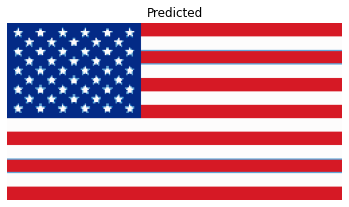

In [142]:
def predict_flag(code):
    imgp = plt.imread("country-flags/png250px/"+code+".png")
    imgp = imgp[:,:,:3]
    pp = imgp.reshape(-1,3)
    country = data[code.upper()]
    predict = km.predict(pp)
    plt.axis("off")
    plt.imshow(km.cluster_centers_[predict].reshape(imgp.shape))
    #plt.imshow(km.predict(imgp).reshape(imgp.shape))
    plt.title("Predicted")
    plt.savefig(code+"_predict.svg")
predict_flag("us")

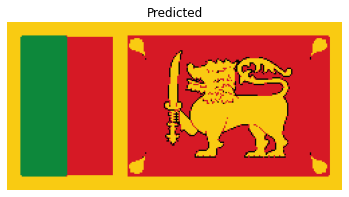

In [126]:
a = ["in","ug","us","fj","lk"]
for key in a: 
    predict_flag(key)

In [86]:
(predict == 5).astype(int).mean()

0.68944

In [25]:
km = KMeans(n_clusters=6)
km.fit(color_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

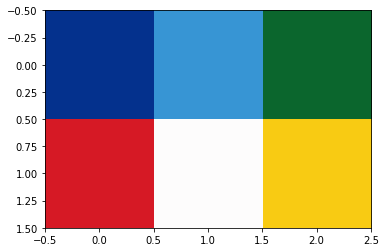

In [26]:
plt.imshow(km.cluster_centers_.reshape(2,3,3))

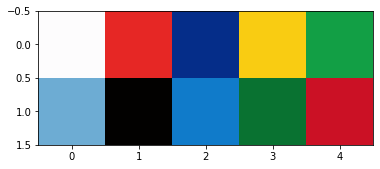

In [28]:
km = KMeans(n_clusters=10)
km.fit(color_table)
plt.imshow(km.cluster_centers_.reshape(2,5,3))